# Set Up and Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
music_data = pd.read_csv('./tracks.csv')
music_data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


# Data Cleaning

In [3]:
print(music_data.shape)
print(music_data.columns)
print(music_data.head())
print(music_data.info())

(586672, 20)
Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')
                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk

In [4]:
# converting release_date to datetime
music_data['release_date'] = pd.to_datetime(music_data['release_date'], errors='coerce')

# extract year and saving in a new column
music_data['release_year'] = music_data['release_date'].dt.year
print(music_data[['release_date', 'release_year']].head())

  release_date  release_year
0   1922-02-22        1922.0
1   1922-06-01        1922.0
2   1922-03-21        1922.0
3   1922-03-21        1922.0
4          NaT           NaN


In [5]:
# removing rows with null release year
music_data = music_data.dropna(subset=['release_year'])

# making year numeric (float → int)
music_data.loc[:, 'release_year'] = music_data['release_year'].astype(int)
print(music_data[['release_year', 'valence']].head())

   release_year  valence
0        1922.0    0.127
1        1922.0    0.655
2        1922.0    0.457
3        1922.0    0.397
9        1922.0    0.612


In [6]:
print(music_data[['valence', 'release_year']].isnull().sum())

valence         0
release_year    0
dtype: int64


In [7]:
# keeping only songs released in or after 1921
music_data = music_data[music_data['release_year'] >= 1921]
print(music_data['release_year'].min(), music_data['release_year'].max())

1922.0 2021.0


In [8]:
# checking if valence is normalized
print("Min valence:", music_data['valence'].min())
print("Max valence:", music_data['valence'].max())
print("Summary stats:")
print(music_data['valence'].describe())

Min valence: 0.0
Max valence: 1.0
Summary stats:
count    448080.000000
mean          0.555092
std           0.254527
min           0.000000
25%           0.351000
50%           0.566000
75%           0.769000
max           1.000000
Name: valence, dtype: float64


# Exploratory Analysis

## Distribution of Valence in All Songs

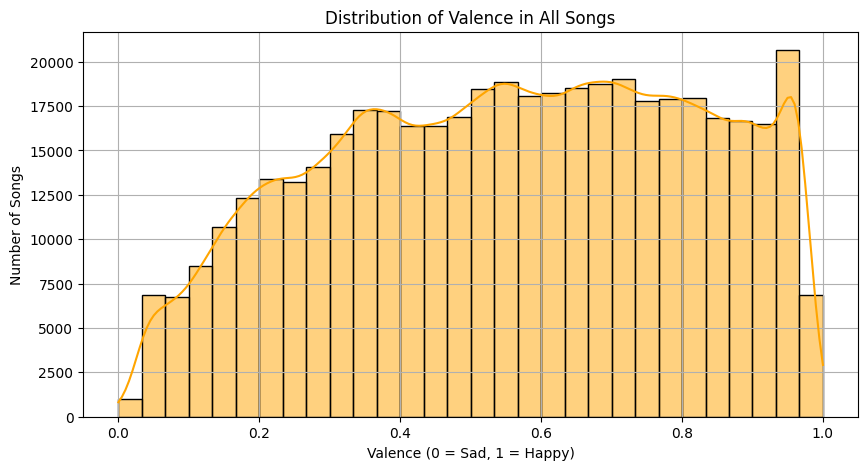

In [11]:
# basic distribution
plt.figure(figsize=(10, 5))
sns.histplot(music_data['valence'], bins=30, kde=True, color='orange')
plt.title("Distribution of Valence in All Songs")
plt.xlabel("Valence (0 = Sad, 1 = Happy)")
plt.ylabel("Number of Songs")
plt.grid(True)
plt.show()

### 🔍 What This Shows

This histogram shows the **distribution of valence scores** across all songs in the dataset.

- It reveals the **overall emotional tone** of music from 1921 to 2020.
- A valence close to `1` indicates **happier**, more **positive** songs, while a valence near `0` indicates **sadder**, more **negative** ones.
- The shape of this distribution helps us understand whether most music historically leans toward **joyful** or **melancholic** tones.

This plot provides a foundational understanding of the emotional landscape of the entire dataset.

## Average Song Valence Over Time (1921–2020)

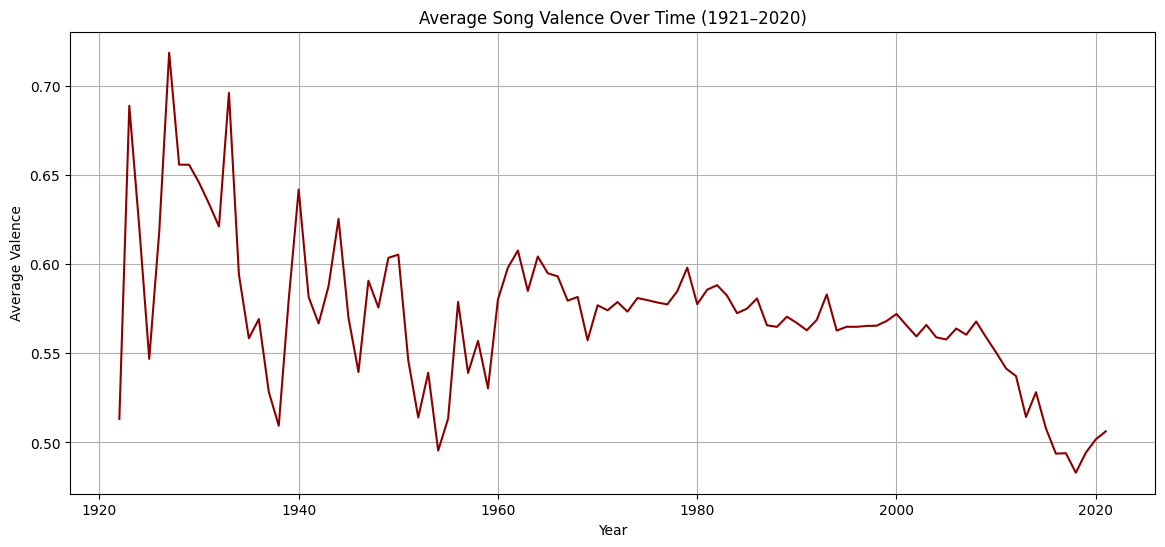

In [14]:
#to calculate average valence per year
valence_trend = music_data.groupby('release_year')['valence'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=valence_trend, x='release_year', y='valence', color='darkred')
plt.title('Average Song Valence Over Time (1921–2020)')
plt.xlabel('Year')
plt.ylabel('Average Valence')
plt.grid(True)
plt.show()

### 🔍 What This Shows

This line chart visualizes the **average valence (musical happiness or positivity)** of songs released each year from **1921 to 2020**. Valence again, is a value between `0` (very sad, depressed) and `1` (very happy, cheerful).

By observing the trend, we can explore questions like:

- Are songs becoming happier or sadder over time?
- Do certain historical periods (e.g., wars, social movements, economic shifts) correspond to noticeable emotional changes in music?
- Are there specific eras where music leaned toward melancholy or joy?

This sets the foundation for deeper analysis using **rolling averages** and correlation with global events.

## Valence Over Time with 5-Year Smoothing

In [16]:
# adding a new column for rolling average
valence_trend['valence_smooth'] = valence_trend['valence'].rolling(window=5, center=True).mean()

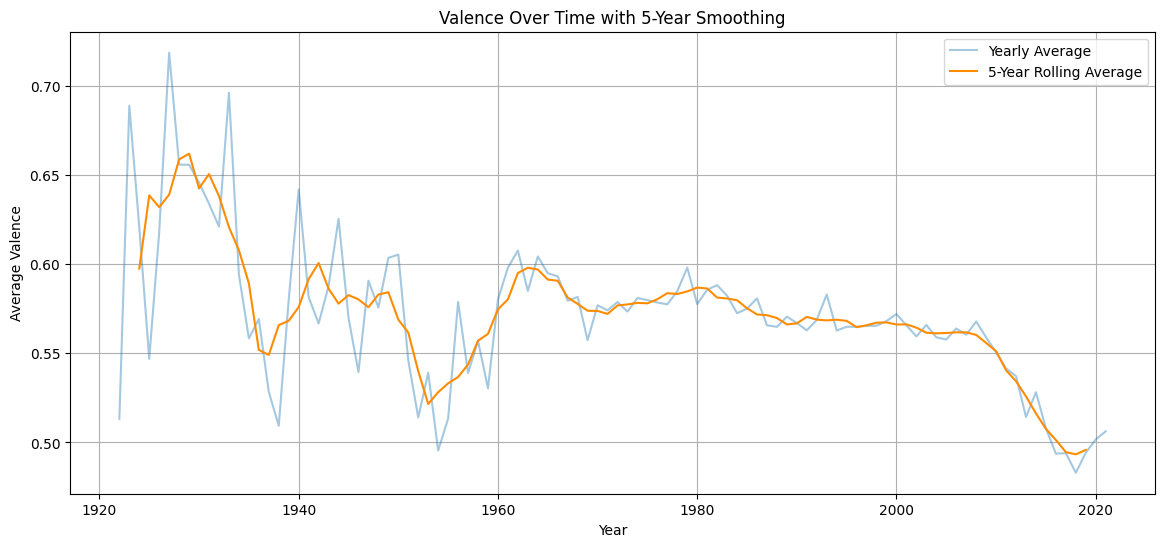

In [18]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=valence_trend, x='release_year', y='valence', label='Yearly Average', alpha=0.4)
sns.lineplot(data=valence_trend, x='release_year', y='valence_smooth', label='5-Year Rolling Average', color='darkorange')

plt.title('Valence Over Time with 5-Year Smoothing')
plt.xlabel('Year')
plt.ylabel('Average Valence')
plt.legend()
plt.grid(True)
plt.show()

### 🔍 What This Shows

This line plot compares the **yearly average valence** of songs to a **5-year rolling average**, helping to smooth out short-term fluctuations.

- The **light line** shows the raw average valence each year — it may appear noisy or erratic.
- The **bold orange line** is a smoothed trend using a **5-year rolling window**, making it easier to detect **long-term emotional trends** in popular music.
- This approach helps highlight broader shifts in the **emotional tone** of music, such as periods of overall happiness or melancholy, possibly correlating with **historical, social, or cultural events**.

Smoothing the data reveals more meaningful insights beyond annual spikes or dips.

# Overlaying Historical events

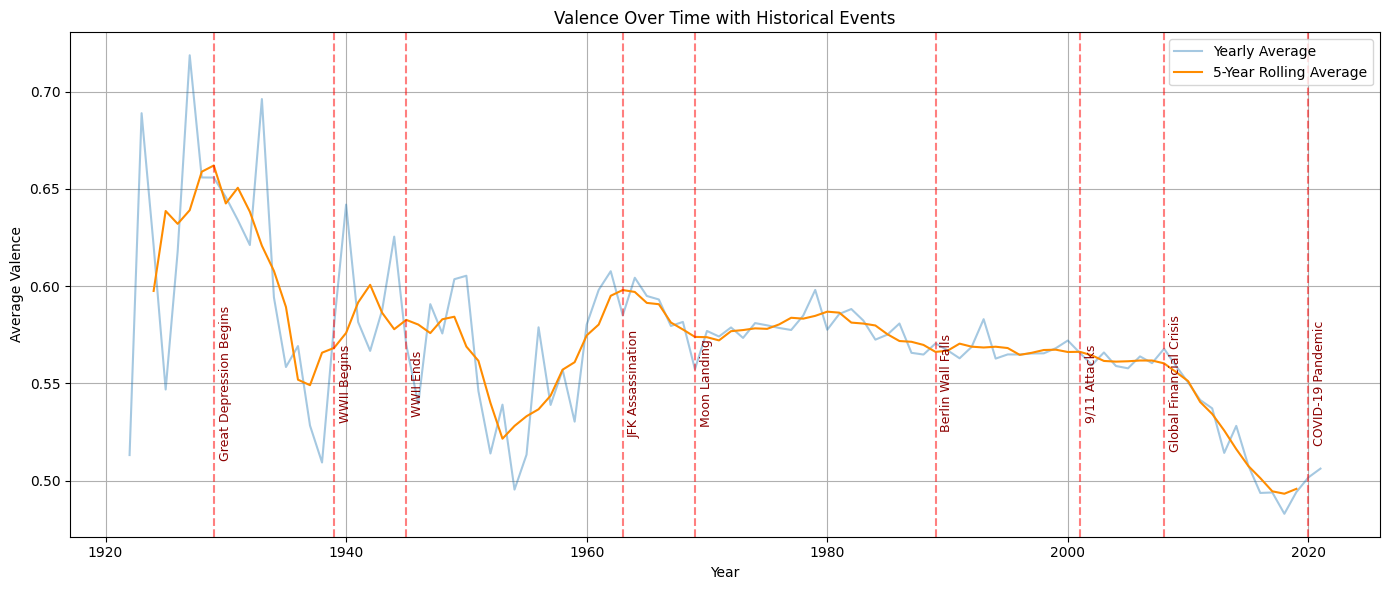

In [21]:
plt.figure(figsize=(14, 6))

# plotting valence trends
sns.lineplot(data=valence_trend, x='release_year', y='valence', label='Yearly Average', alpha=0.4)
sns.lineplot(data=valence_trend, x='release_year', y='valence_smooth', label='5-Year Rolling Average', color='darkorange')

# historical events to annotate
historical_events = {
    1929: "Great Depression Begins",
    1939: "WWII Begins",
    1945: "WWII Ends",
    1963: "JFK Assassination",
    1969: "Moon Landing",
    1989: "Berlin Wall Falls",
    2001: "9/11 Attacks",
    2008: "Global Financial Crisis",
    2020: "COVID-19 Pandemic"
}

# plotting annotations
for year, label in historical_events.items():
    plt.axvline(x=year, color='red', linestyle='--', alpha=0.5)
    plt.text(year + 0.4, 0.55, label, rotation=90, color='darkred',
             verticalalignment='center', fontsize=9)

plt.title('Valence Over Time with Historical Events')
plt.xlabel('Year')
plt.ylabel('Average Valence')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 🔍 What This Shows

This chart overlays major global events on top of the 5-year smoothed average valence of songs:

- Red dashed lines indicate key historical moments such as **World Wars**, **economic crises**, and the **COVID-19 pandemic**.
- These annotations help us **contextualize emotional trends** in music — for example, dips in valence may correspond to **periods of conflict or uncertainty**, while peaks may follow **recovery or cultural milestones**.

It allows a socio-emotional reading of how music may reflect or respond to the global mood.

# Additional Deep Dives 

## Correlation Heatmap Between Audio Features

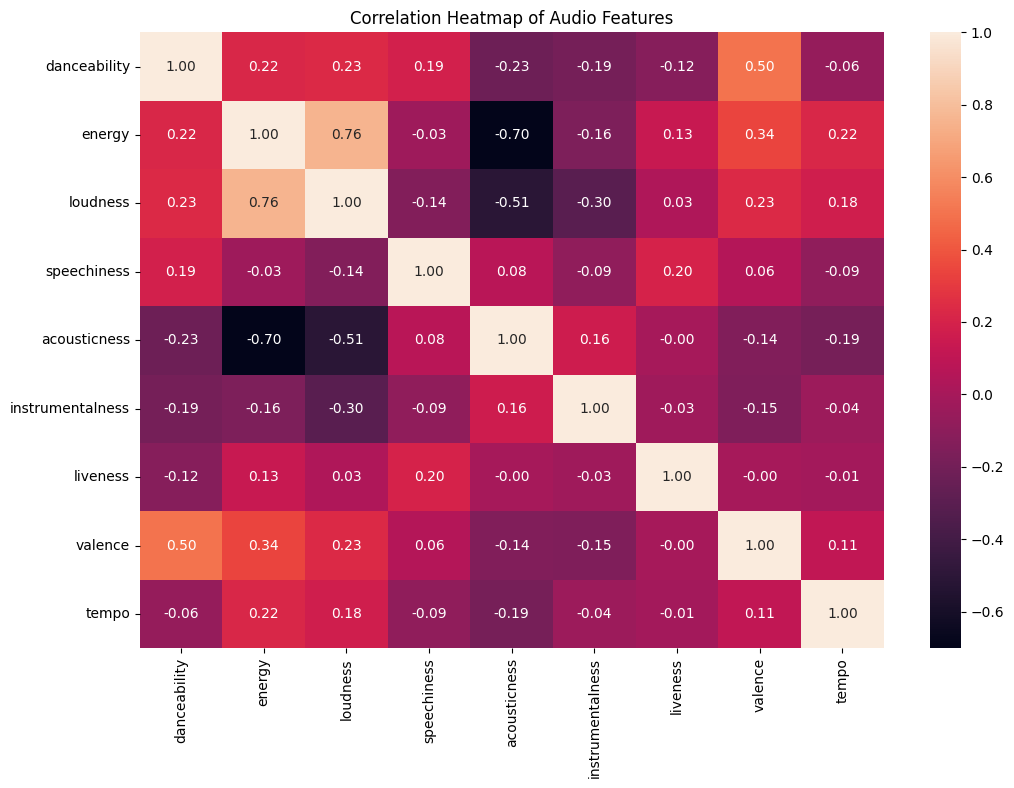

In [23]:
# selecting only numeric audio features
audio_features = music_data[['danceability', 'energy', 'loudness', 'speechiness',
'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# plotting
plt.figure(figsize=(12, 8))
sns.heatmap(audio_features.corr(), annot=True, fmt=".2f", cmap="rocket")
plt.title("Correlation Heatmap of Audio Features")
plt.show()

### 🔍 What this shows:

The correlation heatmap reveals how audio features relate to one another. For instance, if *energy* and *loudness* are highly correlated, we can infer that louder songs tend to be more energetic. A negative correlation between *acousticness* and *energy* might indicate that acoustic tracks are generally softer or less intense.

## Relationship Between Danceability & Valence

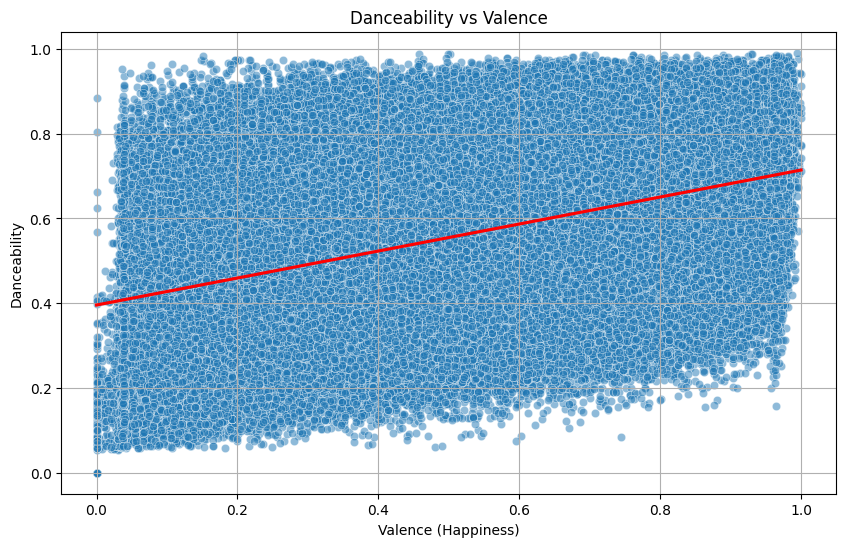

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=music_data, x='valence', y='danceability', alpha=0.5)
sns.regplot(data=music_data, x='valence', y='danceability', scatter=False, color='red')
plt.title("Danceability vs Valence")
plt.xlabel("Valence (Happiness)")
plt.ylabel("Danceability")
plt.grid(True)
plt.show()

### 🔍 What this shows:

This visualization examines whether emotionally positive songs are also high-energy. It helps distinguish between upbeat songs that are energetic (e.g., pop) vs. calm but happy songs (e.g., acoustic love songs).

## Energy vs Valence: Are Happy Songs Always Energetic?

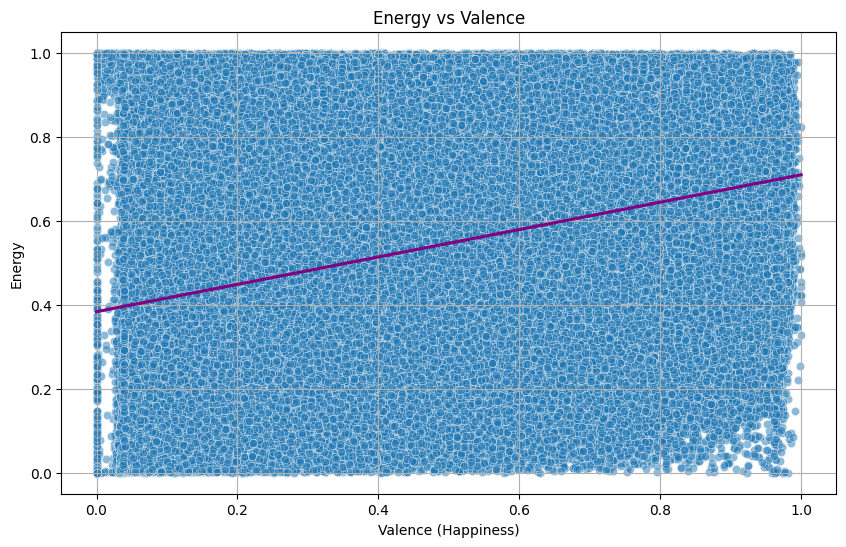

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=music_data, x='valence', y='energy', alpha=0.5)
sns.regplot(data=music_data, x='valence', y='energy', scatter=False, color='purple')
plt.title("Energy vs Valence")
plt.xlabel("Valence (Happiness)")
plt.ylabel("Energy")
plt.grid(True)
plt.show()

### 🔍 What this shows:

This visualization examines whether emotionally positive songs are also high-energy. It helps distinguish between upbeat songs that are energetic (e.g., pop) vs. calm but happy songs (e.g., acoustic love songs).

## Acousticness Trend Over Time

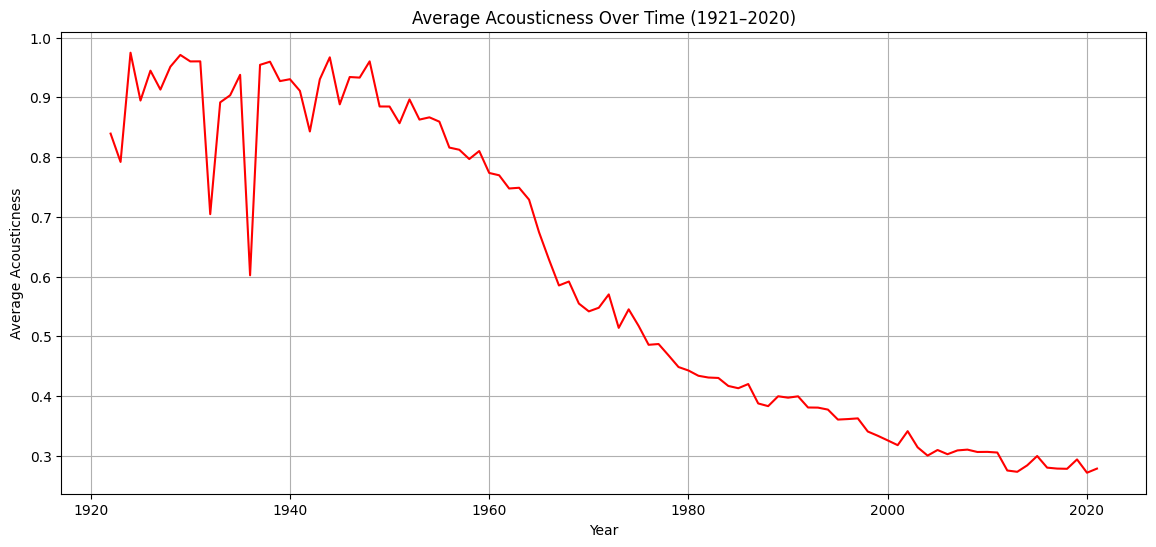

In [30]:
acoustic_trend = music_data.groupby('release_year')['acousticness'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=acoustic_trend, x='release_year', y='acousticness', color='red')
plt.title('Average Acousticness Over Time (1921–2020)')
plt.xlabel('Year')
plt.ylabel('Average Acousticness')
plt.grid(True)
plt.show()

### 🔍 What this shows:

Tracks from earlier decades were generally more acoustic. A downward trend in acousticness suggests increased use of electronic instruments and production techniques in modern music.